In [1]:
# import the necessary libraries
import numpy as np 
import pandas as pd 
from datetime import date, timedelta

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
df= pd.read_csv('data/india.csv')

sdate = date.today()-timedelta(days=30)

df['diagnosed_date'] = pd.to_datetime(df['diagnosed_date'],format='%d-%m-%Y')

df = df[df['diagnosed_date']>sdate.strftime('%d-%m-%Y')]
df = df[df['diagnosed_date']<=date.today().strftime('%d-%m-%Y')]


In [3]:
df.head()

,id,unique_id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,current_status,notes,contracted_from,nationality,type_of_transmission,status_change,source1,source2,source3,backup
3,4,4,DL-P1,2020-03-02,45.0,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,"Travelled from Austria, Italy",NaN,India,Imported,15-03-2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria
4,5,5,TS-P1,2020-03-02,24.0,M,Hyderabad,Hyderabad,Telangana,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",NaN,India,Imported,02-03-2020,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact"
5,6,6,NaN,2020-03-03,69.0,M,Jaipur,Jaipur,Rajasthan,Recovered,Travelled from Italy,NaN,Italy,Imported,03-03-2020,https://indianexpress.com/article/india/corona...,https://economictimes.indiatimes.com/news/poli...,https://twitter.com/PTI_News/status/1240878975...,Italian tourist
6,7,7,NaN,2020-03-04,55.0,NaN,Gurugram,Gurugram,Haryana,Recovered,Travelled from Italy,P6,Italy,Imported,29-03-2020,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,NaN,Italian tourist
7,8,8,NaN,2020-03-04,55.0,NaN,Gurugram,Gurugram,Haryana,Recovered,Travelled from Italy,P6,Italy,Imported,29-03-2020,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,NaN,Italian tourist


In [4]:
df.tail()

,id,unique_id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,current_status,notes,contracted_from,nationality,type_of_transmission,status_change,source1,source2,source3,backup
1303,1304,1304,NaN,2020-03-30,NaN,NaN,NaN,NaN,Delhi,Hospitalized,Details awaited,NaN,NaN,NaN,30-03-2020,https://twitter.com/ANI/status/124464075167946...,NaN,NaN,NaN
1304,1305,1305,NaN,2020-03-30,NaN,NaN,NaN,NaN,Delhi,Hospitalized,Details awaited,NaN,NaN,NaN,30-03-2020,https://twitter.com/ANI/status/124464075167946...,NaN,NaN,NaN
1305,1306,1306,NaN,2020-03-30,NaN,NaN,NaN,NaN,Delhi,Hospitalized,Details awaited,NaN,NaN,NaN,30-03-2020,https://twitter.com/ANI/status/124464075167946...,NaN,NaN,NaN
1306,1307,1307,NaN,2020-03-30,NaN,NaN,NaN,NaN,Punjab,Hospitalized,Details awaited,NaN,NaN,NaN,30-03-2020,https://dronamaps.com/corona.html#/,NaN,NaN,NaN
1307,1308,1308,NaN,2020-03-30,NaN,NaN,NaN,NaN,Punjab,Hospitalized,Details awaited,NaN,NaN,NaN,30-03-2020,https://dronamaps.com/corona.html#/,NaN,NaN,NaN


In [5]:
print('Total Detected  ' + str(df['id'].count()))
print('-------------------')
print(df['current_status'].value_counts())

Total Detected  1305
-------------------
Hospitalized    1236
Recovered         49
Deceased          19
Migrated           1
Name: current_status, dtype: int64


In [6]:
# check missing data
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count
14,status_change,3
10,notes,7
15,source1,12
7,detected_district,218
6,detected_city,640
16,source2,715
5,gender,720
13,type_of_transmission,741
4,age,761
12,nationality,892


In [7]:
# treat age outliers
col = 'age'
fmean = df[col].mean()
fstd = df[col].std()
df.ix[np.abs(df[col]-fmean) > (3*fstd), col] = fmean + (3*fstd)  # treat upper outliers
df.ix[np.abs(df[col]-fmean) < -(3*fstd), col] = -(fmean + (3*fstd)) # treat lower outliers

# missing age filled with median
df[col].fillna(df[col].median(), inplace=True) 

# mark missing data
df['gender'].fillna('NA', inplace=True) 
df['nationality'].fillna('India', inplace=True) 
df['detected_district'].fillna('NA', inplace=True) 
df['detected_city'].fillna('NA', inplace=True) 

In [8]:
df.describe()

,id,unique_id,age
count,1305.000000,1305.000000,1305.000000
mean,656.000000,656.000000,38.917740
std,376.865361,376.865361,11.320369
min,4.000000,4.000000,1.000000
25%,330.000000,330.000000,38.000000
50%,656.000000,656.000000,38.000000
75%,982.000000,982.000000,38.000000
max,1308.000000,1308.000000,92.650827


In [9]:
df.describe(include=['O'])

,government_id,gender,detected_city,detected_district,detected_state,current_status,notes,contracted_from,nationality,type_of_transmission,status_change,source1,source2,source3,backup
count,291,1305,1305,1305,1305,1305,1298,273,1305,564,1302,1293,590,139,358
unique,289,3,187,159,27,4,492,90,10,3,27,393,209,68,220
top,KL-PT-P1,NA,NA,NA,Kerala,Hospitalized,Details awaited,P6,India,Imported,27-03-2020,https://twitter.com/PTI_News/status/1243519189...,https://www.facebook.com/permalink.php?story_f...,https://www.facebook.com/CollectorKNR/posts/28...,Details awaited
freq,2,720,640,218,231,1236,383,16,1249,351,170,39,34,15,33


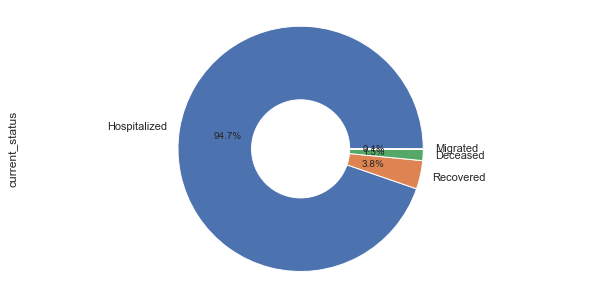

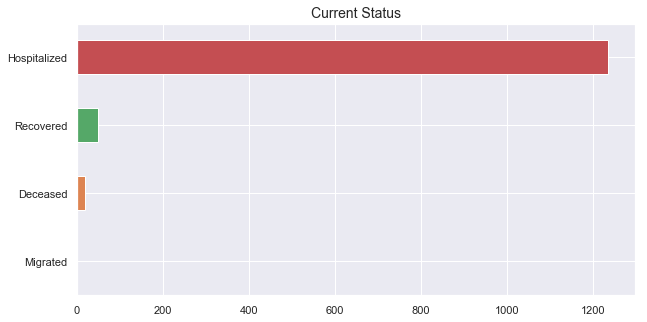

In [10]:
col = 'current_status'

# charts of current status


# pie plot for current status
fig1, ax1 = plt.subplots(figsize=(10,5))
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,5))
ax1.axis('equal')

#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# bar plot for current status
fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True).plot(kind='barh', figsize=(10,5))
plt.title('Current Status', fontsize=14)

plt.show()

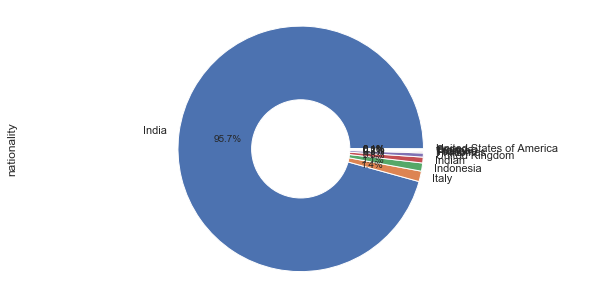

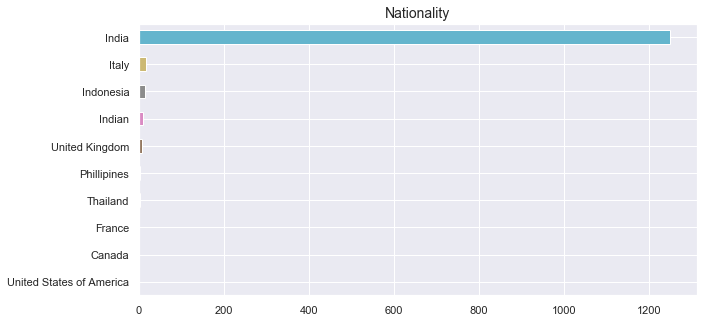

In [11]:
col = 'nationality'

# charts of nationality

# pie plot for nationality
fig1, ax1 = plt.subplots(figsize=(10,5))
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,5))
ax1.axis('equal')

#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# bar plot for nationality
fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True).plot(kind='barh', figsize=(10,5))
plt.title('Nationality', fontsize=14)
plt.show()

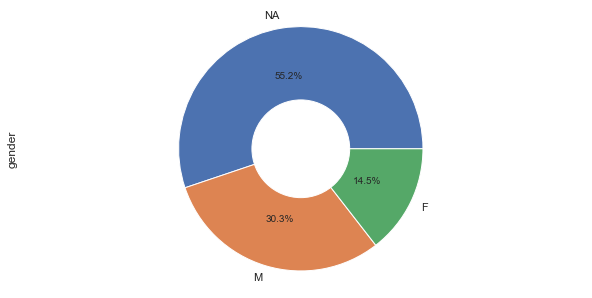

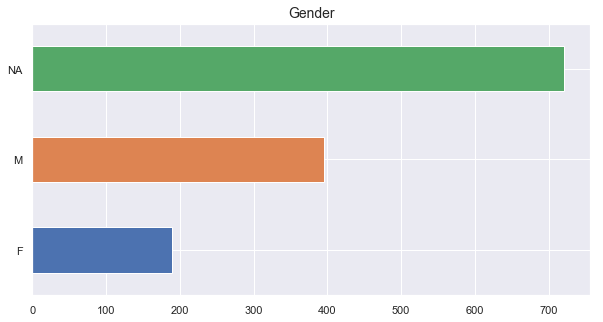

In [12]:
col = 'gender'

# charts of gender

# pie plot for gender
fig1, ax1 = plt.subplots(figsize=(10,5))
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,5))
ax1.axis('equal')

#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# bar plot for gender
fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True).plot(kind='barh', figsize=(10,5))
plt.title('Gender', fontsize=14)
plt.show()

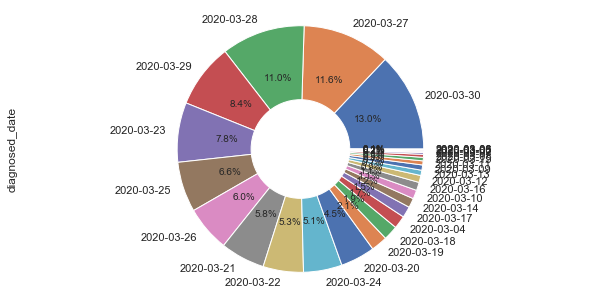

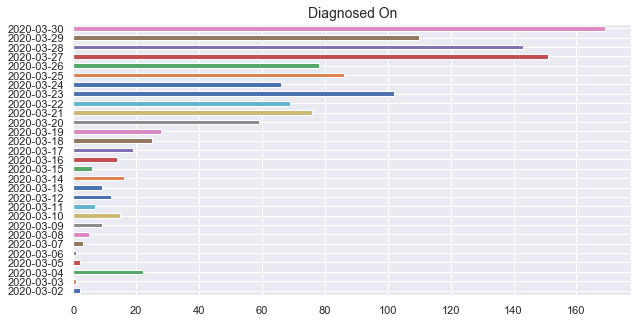

In [13]:
df["diagnosed_date"] = pd.to_datetime(df["diagnosed_date"]).dt.date

col = 'diagnosed_date'

# charts of diagnosed date

# pie plot for diagnosed date
fig1, ax1 = plt.subplots(figsize=(10,5))
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,5))
ax1.axis('equal')

#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# bar plot for diagnosed date
fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts().sort_index().plot(kind='barh', figsize=(10,5))
plt.title('Diagnosed On', fontsize=14)
plt.show()

#df["diagnosed_date"] = pd.to_datetime(df["diagnosed_date"]).dt.strftime('%d-%m-%Y')

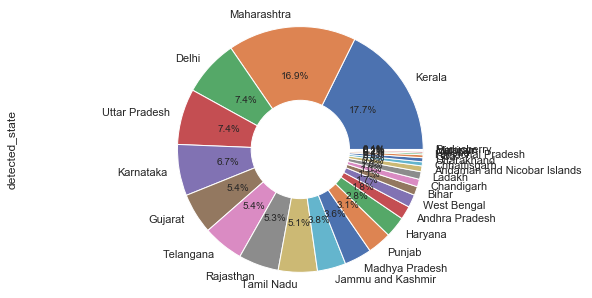

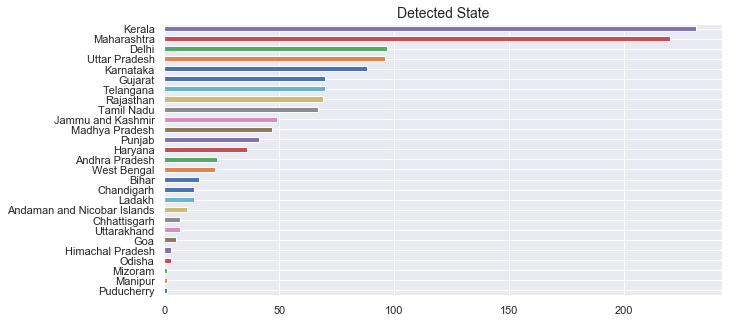

In [14]:
col = 'detected_state'

# charts of detected state

# pie plot for detected state
fig1, ax1 = plt.subplots(figsize=(10,5))
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,5))
ax1.axis('equal')

#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# bar plot for detected state
fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True).plot(kind='barh', figsize=(10,5))
plt.title('Detected State', fontsize=14)
plt.show()

In [15]:
# state-wise data prep
tmp = pd.concat([pd.DataFrame(df['diagnosed_date'].value_counts().sort_index()),
           pd.DataFrame(df[df['current_status'] == 'Hospitalized']['diagnosed_date'].value_counts().sort_index()),
           pd.DataFrame(df[df['current_status'] == 'Recovered']['diagnosed_date'].value_counts().sort_index()), 
           pd.DataFrame(df[df['current_status'] == 'Deceased']['diagnosed_date'].value_counts().sort_index())], 
          axis=1).fillna(0).astype('int32')
tmp.columns = ['Overall','Hospitalized','Recovered','Deceased']

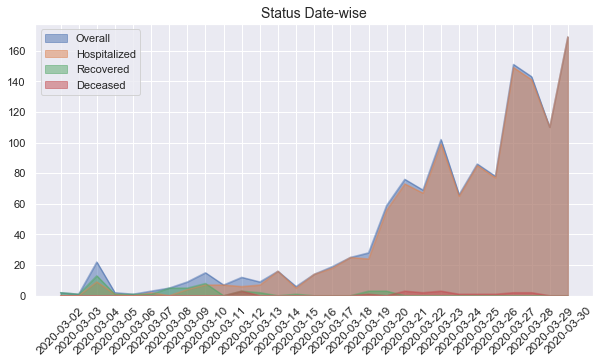

In [16]:
# Detection State-wise
tmp.plot.area(stacked=False, figsize=(10,5))

plt.xticks(tmp.index, fontsize=12, rotation=45)
plt.title('Status Date-wise', fontsize=14)
plt.show()

In [17]:
# cumulative sum data prep
tmp_cumsum = pd.DataFrame()
tmp_cumsum['Overall_CumSum'] = tmp['Overall'].cumsum()
tmp_cumsum['Hospitalized_CumSum'] = tmp['Hospitalized'].cumsum()
tmp_cumsum['Recovered_CumSum'] = tmp['Recovered'].cumsum()
tmp_cumsum['Deceased_CumSum'] = tmp['Deceased'].cumsum()


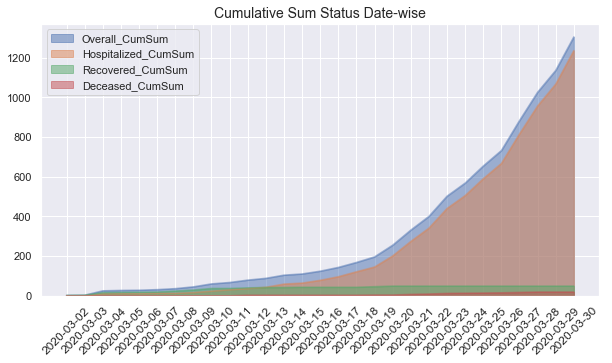

In [18]:
# Cumulative Sum Detected by States
tmp_cumsum.plot.area(stacked=False, figsize=(10,5))

plt.xticks(tmp.index, fontsize=12, rotation=45)
plt.title('Cumulative Sum Status Date-wise', fontsize=14)
plt.show()

In [19]:
# state-wise data prep
tmp = pd.concat([pd.DataFrame(df['diagnosed_date'].value_counts().sort_index()),
           pd.DataFrame(df[df['detected_state'] == 'Kerala']['diagnosed_date'].value_counts().sort_index()),
           pd.DataFrame(df[df['detected_state'] == 'Maharashtra']['diagnosed_date'].value_counts().sort_index()), 
           pd.DataFrame(df[df['detected_state'] == 'Karnataka']['diagnosed_date'].value_counts().sort_index()), 
           pd.DataFrame(df[df['detected_state'] == 'Telangana']['diagnosed_date'].value_counts().sort_index()), 
           pd.DataFrame(df[df['detected_state'] == 'Delhi']['diagnosed_date'].value_counts().sort_index()), 
           pd.DataFrame(df[df['detected_state'] == 'Uttar Pradesh']['diagnosed_date'].value_counts().sort_index())], 
          axis=1).fillna(0).astype('int32')
tmp.columns = ['Overall','Kerala','Maharashtra','Karnataka','Telangana','Delhi','Uttar Pradesh']

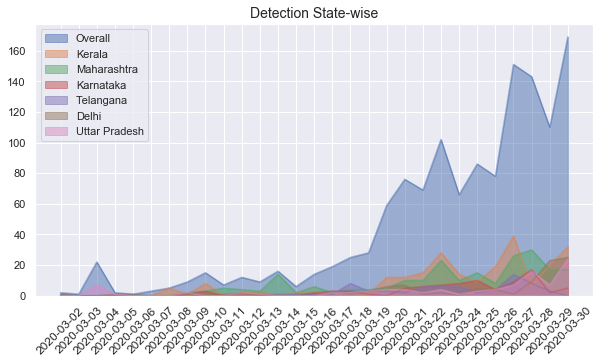

In [20]:
# Detection State-wise
tmp.plot.area(stacked=False, figsize=(10,5))

plt.xticks(tmp.index, fontsize=12, rotation=45)
plt.title('Detection State-wise', fontsize=14)
plt.show()

In [21]:
# cumulative sum data prep
tmp_cumsum = pd.DataFrame()
#tmp_cumsum['Overall_CumSum'] = tmp['Overall'].cumsum()
tmp_cumsum['Maharashtra_CumSum'] = tmp['Maharashtra'].cumsum()
tmp_cumsum['Kerala_CumSum'] = tmp['Kerala'].cumsum()
tmp_cumsum['Karnataka_CumSum'] = tmp['Karnataka'].cumsum()
tmp_cumsum['Telangana_CumSum'] = tmp['Telangana'].cumsum()
tmp_cumsum['Delhi_CumSum'] = tmp['Delhi'].cumsum()
tmp_cumsum['Uttar Pradesh_CumSum'] = tmp['Uttar Pradesh'].cumsum()

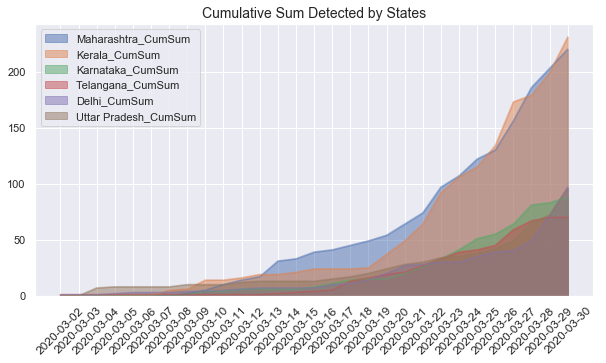

In [22]:
# Cumulative Sum Detected by States
tmp_cumsum.plot.area(stacked=False, figsize=(10,5))

plt.xticks(tmp.index, fontsize=12, rotation=45)
plt.title('Cumulative Sum Detected by States', fontsize=14)
plt.show()

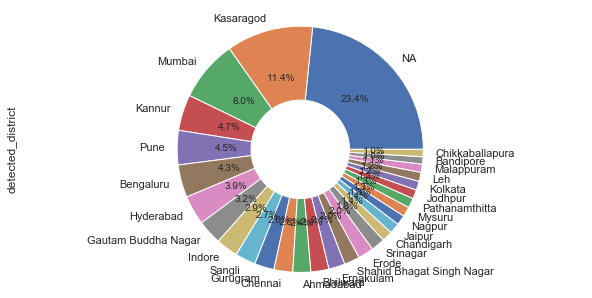

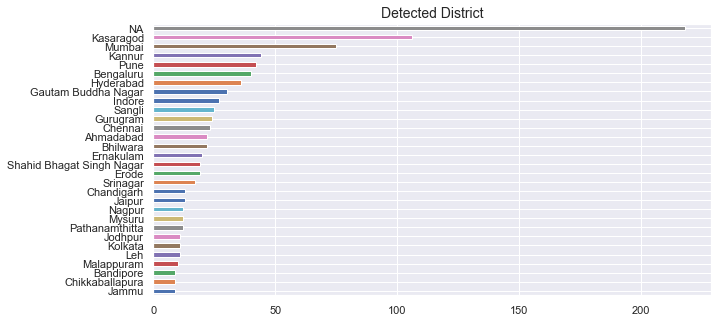

In [23]:
col = 'detected_district'

# charts of detected district

# pie plot for detected district
fig1, ax1 = plt.subplots(figsize=(10,5))
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[col].value_counts()[0:29].plot(kind='pie', autopct='%1.1f%%', figsize=(10,5))
ax1.axis('equal')

#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# bar plot for detected district
fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True)[-30:].plot(kind='barh', figsize=(10,5))
plt.title('Detected District', fontsize=14)
plt.show()

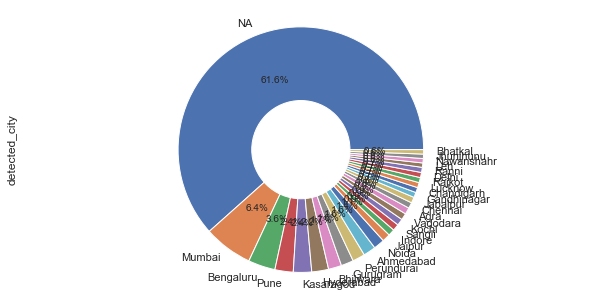

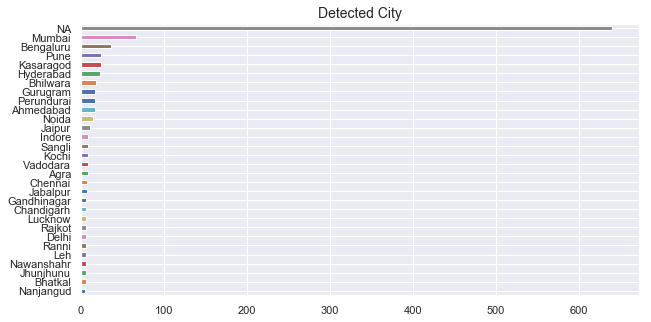

In [24]:
col = 'detected_city'

# charts of detected city

# pie plot for detected city
fig1, ax1 = plt.subplots(figsize=(10,5))
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
df[col].value_counts()[0:29].plot(kind='pie', autopct='%1.1f%%', figsize=(10,5))
ax1.axis('equal')

#draw circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# bar plot for detected city
fig2, ax2 = plt.subplots(figsize=(10,5))
df[col].value_counts(ascending=True)[-30:].plot(kind='barh', figsize=(10,5))
plt.title('Detected City', fontsize=14)
plt.show()

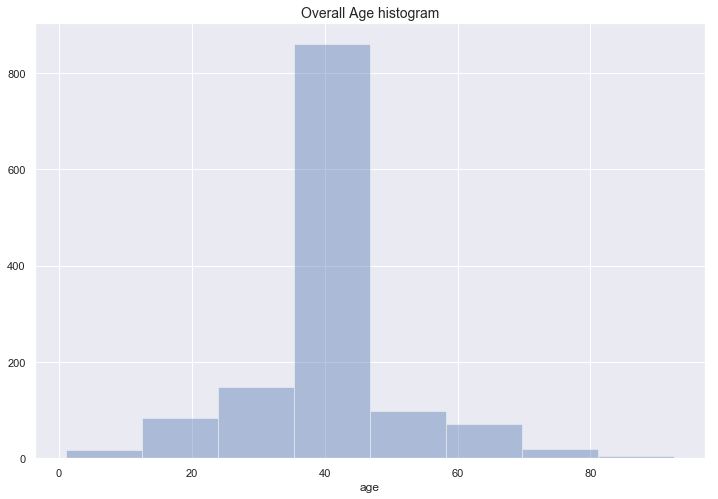

In [25]:
col = 'age'
# age histogram
plt.figure(figsize=(12,8))
sns.distplot(df[col].values, bins=8, kde=False)
plt.xlabel(col, fontsize=12)
plt.title('Overall Age histogram', fontsize=14)
plt.show()

In [26]:
df['current_status'].value_counts()

Hospitalized    1236
Recovered         49
Deceased          19
Migrated           1
Name: current_status, dtype: int64

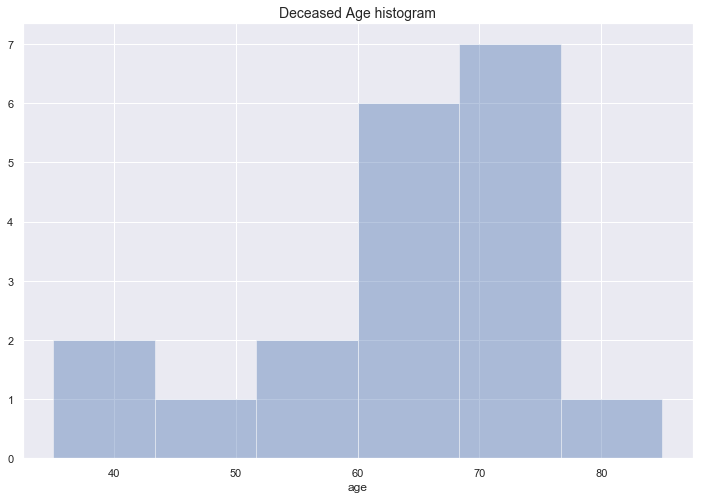

In [27]:
col1 = 'current_status'
col2 = 'age'
tmp = df[df[col1] == 'Deceased']
plt.figure(figsize=(12,8))
sns.distplot(tmp[col2].values, bins=6, kde=False)
plt.xlabel(col2, fontsize=12)
plt.title('Deceased Age histogram', fontsize=14)
plt.show()

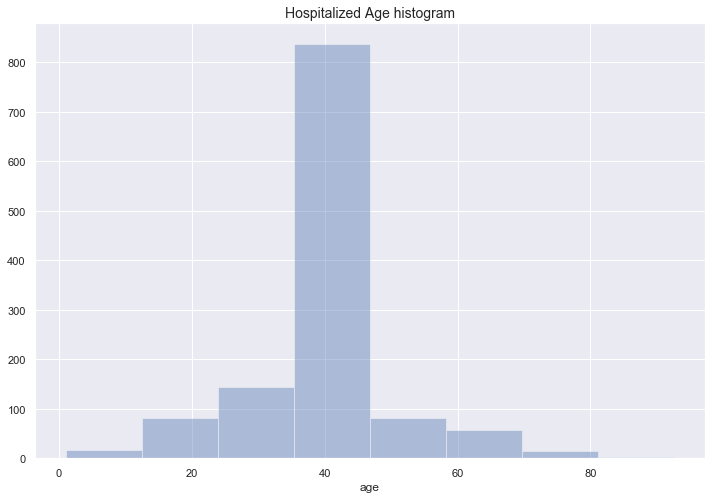

In [28]:
col1 = 'current_status'
col2 = 'age'
tmp = df[df[col1] == 'Hospitalized']
plt.figure(figsize=(12,8))
sns.distplot(tmp[col2].values, bins=8, kde=False)
plt.xlabel(col2, fontsize=12)
plt.title('Hospitalized Age histogram', fontsize=14)
plt.show()

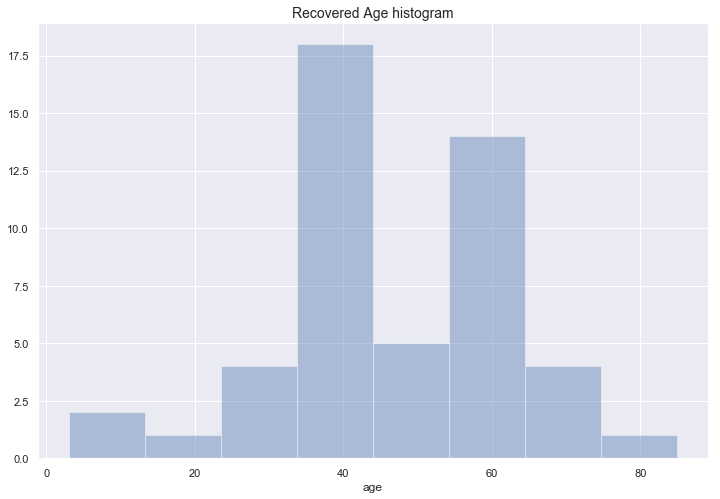

In [29]:
col1 = 'current_status'
col2 = 'age'
tmp = df[df[col1] == 'Recovered']
plt.figure(figsize=(12,8))
sns.distplot(tmp[col2].values, bins=8, kde=False)
plt.xlabel(col2, fontsize=12)
plt.title('Recovered Age histogram', fontsize=14)
plt.show()